In [6]:
import numpy as np
import json
import csv

# instrument-level impute
Z4 = np.genfromtxt('../data/impute_bvs_simplex_offset_Z4.csv', delimiter=',')
print(Z.shape)

# entry-level impute
Z12 = np.genfromtxt('../data/impute_bvs_simplex_offset_Z12.csv', delimiter=',')
print(Z.shape)

# true values
all_data = np.genfromtxt('../data/all_samples_filtered.csv', delimiter=',', skip_header=True, missing_values=['None', ''])[:, 1:]
print(all_data.shape)

# Grab header and identifiers
sample_identifiers = []
with open('../data/all_samples_filtered.csv', 'r') as f:
    reader = csv.reader(f)
    header = next(reader)[1:]
    for pieces in reader:
        sample_identifiers.append(pieces[0])
    
    
print(len(sample_identifiers), sample_identifiers[:10])
print(len(header), header[:10])


(16291, 250)
(16291, 250)
(16291, 250)
16291 ['AU000103', 'AU000104', 'AU000105', 'AU000106', 'AU000503', 'AU000504', 'AU000703', 'AU000704', 'AU000803', 'AU000804']
250 ['ADIR:Q11', 'ADIR:Q12', 'ADIR:Q13', 'ADIR:Q14', 'ADIR:Q15', 'ADIR:Q16', 'ADIR:Q18', 'ADIR:Q20', 'ADIR:Q21', 'ADIR:Q22']


In [9]:
adir_features = [i for i, x in enumerate(header) if x.startswith('ADIR')]
ados_features = [i for i, x in enumerate(header) if x.startswith('ADOS')]
srs_features = [i for i, x in enumerate(header) if x.startswith('SRS')]

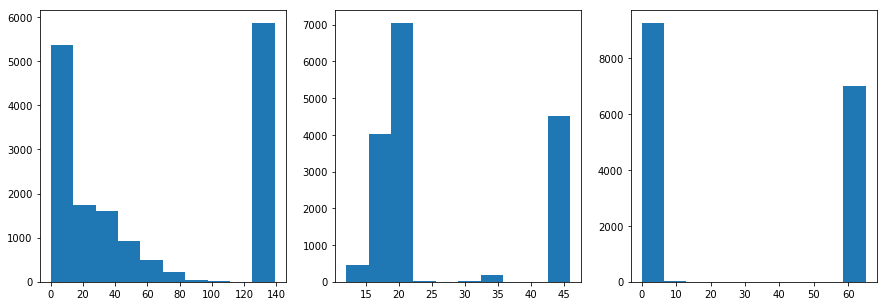

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(np.sum(np.isnan(all_data[:, adir_features]), axis=1))
plt.subplot(1, 3, 2)
plt.hist(np.sum(np.isnan(all_data[:, ados_features]), axis=1))
plt.subplot(1, 3, 3)
plt.hist(np.sum(np.isnan(all_data[:, srs_features]), axis=1))
plt.show()

In [13]:
missing_adir = np.where(np.sum(np.isnan(all_data[:, adir_features]), axis=1) == len(adir_features))[0]
missing_ados = np.where(np.sum(np.isnan(all_data[:, ados_features]), axis=1) == len(ados_features))[0]
missing_srs = np.where(np.sum(np.isnan(all_data[:, srs_features]), axis=1) == len(srs_features))[0]
print(missing_adir.shape, missing_ados.shape, missing_srs.shape)

(5661,) (4301,) (7001,)


In [14]:
all_data[np.ix_(missing_adir, adir_features)] = Z4[np.ix_(missing_adir, adir_features)]
all_data[np.ix_(missing_ados, ados_features)] = Z4[np.ix_(missing_ados, ados_features)]
all_data[np.ix_(missing_srs, srs_features)] = Z4[np.ix_(missing_srs, srs_features)]

In [15]:
all_data[np.isnan(all_data)] = Z12[np.isnan(all_data)]

In [17]:
print(np.sum(np.isnan(all_data)))

0


In [25]:
with open('../data/full_imputed_bvs_simplex_offset.txt', 'w+') as f:
    f.write('Sample ID\t%s\n' % '\t'.join(header))
    for sample_id, values in zip(sample_identifiers, all_data):
        f.write('%s\t%s\n' % (sample_id, '\t'.join(['%d' % d for d in values])))